##### 由于B站工作人员经常清理我的个人简介，导致很多同学看不到QQ群和其他群号。
##### 其它课程和专栏在网易云课堂 + 微信公众号：唐国梁Tommy
#### 第13 QQ群：694112390
#### 代码在百度云盘群号：2133511255

### 案例实现思路：

* 1. 加载数据集、预处理

* 2. 特征工程

* 3. 构建模型

* 4. 模型编译、训练、验证

* 5. 模型测试

* 6. 结果可视化

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow.keras import Sequential, layers, utils

import warnings
warnings.filterwarnings('ignore')

### 第1步：加载数据集、预处理

In [57]:
# 读取数据集

# dataset = pd.read_csv('DOM_hourly.csv')
dataset = pd.read_excel("../../data/碳排放总量.xlsx",index_col=0)

In [58]:
# 显示shape 
    
dataset.shape

(21, 12)

In [59]:
# 默认显示前5行

dataset.head()

,江西省,南昌市,景德镇市,萍乡市,九江市,新余市,鹰潭市,赣州市,吉安市,宜春市,抚州市,上饶市
2000,4019.388271,736.250475,191.548481,177.205198,619.502447,215.698632,216.631655,1078.029471,1110.368063,1202.178139,841.635627,929.563308
2001,3994.418834,733.348364,186.691805,171.298964,616.850311,217.873308,216.296654,1081.389128,1113.798678,1194.325272,849.408622,930.370928
2002,3981.503663,722.529652,190.299335,175.752485,602.164893,214.138226,215.960984,1131.087879,1126.030075,1193.239955,815.395192,919.693075
2003,3853.282343,704.345102,184.232497,165.573317,585.197343,208.793316,215.045473,1080.386473,1068.846891,1090.236335,947.578047,837.749459
2004,4259.181408,746.373703,197.918960,176.709791,621.749893,225.589485,218.799596,1176.419119,1190.452673,1141.283308,1011.753815,922.600367


In [60]:
# 显示数据描述

dataset.describe()

,江西省,南昌市,景德镇市,萍乡市,九江市,新余市,鹰潭市,赣州市,吉安市,宜春市,抚州市,上饶市
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,4591.054353,779.732364,201.611621,188.824702,670.440186,215.533325,227.981808,1188.947312,1268.401371,1274.828354,917.545665,1064.050444
std,379.046436,36.675939,7.568485,13.215762,48.569340,6.850213,10.224848,54.495476,100.011384,85.093987,50.346044,122.276852
min,3853.282343,704.345102,184.232497,165.573317,585.197343,206.336416,215.045473,1078.029471,1068.846891,1090.236335,815.395192,837.749459
25%,4431.310599,748.046697,200.314590,177.735826,632.240662,209.803264,218.799596,1187.838557,1190.452673,1204.033145,882.240974,980.774194
50%,4664.690954,787.139241,204.430836,188.844010,659.493201,214.138226,225.715829,1196.778452,1292.323638,1282.897093,920.105893,1061.755561
75%,4907.189545,813.388081,206.583603,197.389899,721.960421,218.494867,234.256884,1213.491944,1341.056214,1329.445543,947.578047,1196.897488
max,5042.628498,826.616856,210.366448,213.945208,740.908435,228.789775,249.201577,1264.744063,1389.123403,1402.643110,1011.753815,1227.008657


In [5]:
# 显示字段数据类型

dataset.dtypes

Datetime     object
DOM_MW      float64
dtype: object

In [61]:
# 显示默认前5行

dataset.head()

,江西省,南昌市,景德镇市,萍乡市,九江市,新余市,鹰潭市,赣州市,吉安市,宜春市,抚州市,上饶市
2000,4019.388271,736.250475,191.548481,177.205198,619.502447,215.698632,216.631655,1078.029471,1110.368063,1202.178139,841.635627,929.563308
2001,3994.418834,733.348364,186.691805,171.298964,616.850311,217.873308,216.296654,1081.389128,1113.798678,1194.325272,849.408622,930.370928
2002,3981.503663,722.529652,190.299335,175.752485,602.164893,214.138226,215.960984,1131.087879,1126.030075,1193.239955,815.395192,919.693075
2003,3853.282343,704.345102,184.232497,165.573317,585.197343,208.793316,215.045473,1080.386473,1068.846891,1090.236335,947.578047,837.749459
2004,4259.181408,746.373703,197.918960,176.709791,621.749893,225.589485,218.799596,1176.419119,1190.452673,1141.283308,1011.753815,922.600367


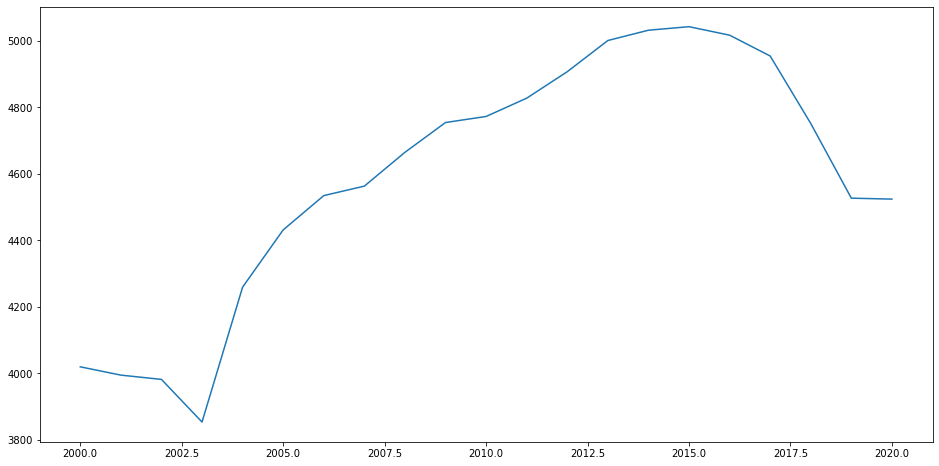

In [62]:
# 可视化显示DOM_MW的数据分布情况

dataset['江西省'].plot(figsize=(16,8))
plt.show()

In [64]:
# 数据进行归一化

scaler = MinMaxScaler()

dataset['江西省'] = scaler.fit_transform(dataset['江西省'].values.reshape(-1, 1))

In [65]:
# 均值为0，标准差为1

dataset.head()

,江西省,南昌市,景德镇市,萍乡市,九江市,新余市,鹰潭市,赣州市,吉安市,宜春市,抚州市,上饶市
2000,0.139662,736.250475,191.548481,177.205198,619.502447,215.698632,216.631655,1078.029471,1110.368063,1202.178139,841.635627,929.563308
2001,0.118667,733.348364,186.691805,171.298964,616.850311,217.873308,216.296654,1081.389128,1113.798678,1194.325272,849.408622,930.370928
2002,0.107808,722.529652,190.299335,175.752485,602.164893,214.138226,215.960984,1131.087879,1126.030075,1193.239955,815.395192,919.693075
2003,0.000000,704.345102,184.232497,165.573317,585.197343,208.793316,215.045473,1080.386473,1068.846891,1090.236335,947.578047,837.749459
2004,0.341279,746.373703,197.918960,176.709791,621.749893,225.589485,218.799596,1176.419119,1190.452673,1141.283308,1011.753815,922.600367


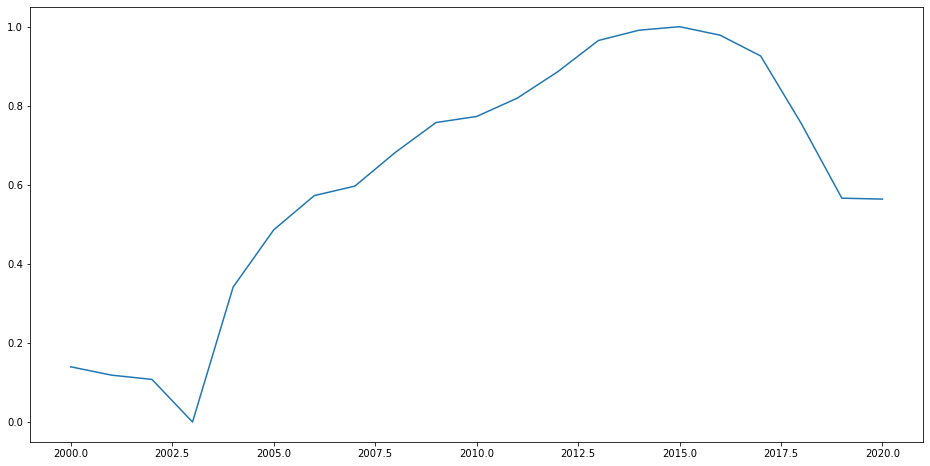

In [66]:
# 可视化显示DOM_MW的数据分布情况

dataset['江西省'].plot(figsize=(16,8))
plt.show()

### 第2步：特征工程

In [67]:
# 功能函数：构造特征数据集和标签集

def create_new_dataset(dataset, seq_len = 12):
    '''基于原始数据集构造新的序列特征数据集
    Params:
        dataset : 原始数据集
        seq_len : 序列长度（时间跨度）
    
    Returns:
        X, y
    '''
    X = [] # 初始特征数据集为空列表
    y = [] # 初始标签数据集为空列表
    
    start = 0 # 初始位置
    end = dataset.shape[0] - seq_len # 截止位置
    
    for i in range(start, end): # for循环构造特征数据集
        sample = dataset[i : i+seq_len] # 基于时间跨度seq_len创建样本
        label = dataset[i+seq_len] # 创建sample对应的标签
        X.append(sample) # 保存sample
        y.append(label) # 保存label
    
    # 返回特征数据集和标签集
    return np.array(X), np.array(y)

In [68]:
# 功能函数：基于新的特征的数据集和标签集，切分：X_train, X_test

def split_dataset(X, y, train_ratio=0.8):
    '''基于X和y，切分为train和test
    Params:
        X : 特征数据集
        y : 标签数据集
        train_ratio : 训练集占X的比例
    
    Returns:
        X_train, X_test, y_train, y_test
    '''
    X_len = len(X) # 特征数据集X的样本数量
    train_data_len = int(X_len * train_ratio) # 训练集的样本数量
    
    X_train = X[:train_data_len] # 训练集
    y_train = y[:train_data_len] # 训练标签集
    
    X_test = X[train_data_len:] # 测试集
    y_test = y[train_data_len:] # 测试集标签集
    
    # 返回值
    return X_train, X_test, y_train, y_test

In [69]:
# 功能函数：基于新的X_train, X_test, y_train, y_test创建批数据(batch dataset)

def create_batch_data(X, y, batch_size=32, data_type=1):
    '''基于训练集和测试集，创建批数据
    Params:
        X : 特征数据集
        y : 标签数据集
        batch_size : batch的大小，即一个数据块里面有几个样本
        data_type : 数据集类型（测试集表示1，训练集表示2）
   
    Returns:
        train_batch_data 或 test_batch_data
    '''
    if data_type == 1: # 测试集
        dataset = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y))) # 封装X和y，成为tensor类型
        test_batch_data = dataset.batch(batch_size) # 构造批数据
        # 返回
        return test_batch_data
    else: # 训练集
        dataset = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y))) # 封装X和y，成为tensor类型
        train_batch_data = dataset.cache().shuffle(1000).batch(batch_size) # 构造批数据
        # 返回
        return train_batch_data

In [77]:
# ① 原始数据集

dataset_original = dataset["江西省"]

In [78]:
print("原始数据集: ", dataset_original.shape)

原始数据集:  (21,)


In [79]:
# ② 构造特征数据集和标签集，seq_len序列长度为12小时

SEQ_LEN = 6 # 序列长度

X, y = create_new_dataset(dataset_original.values, seq_len = SEQ_LEN)

In [80]:
X.shape

(15, 6)

In [81]:
y.shape

(15,)

In [82]:
# 样本1 - 特征数据

X[0]

array([0.13966155, 0.11866729, 0.10780824, 0.        , 0.34127917,
       0.48600507])

In [83]:
# 样本1 - 标签

y[0]

0.5727186247307934

In [84]:
# ③ 数据集切分

X_train, X_test, y_train, y_test = split_dataset(X, y, train_ratio=0.9)

In [85]:
X_train.shape

(13, 6)

In [86]:
X_test.shape

(2, 6)

In [87]:
y_train.shape

(13,)

In [88]:
y_test.shape

(2,)

In [89]:
# ④ 基于新的X_train, X_test, y_train, y_test创建批数据(batch dataset)

# 测试批数据

test_batch_dataset = create_batch_data(X_test, y_test, batch_size=4, data_type=1)

In [90]:
# 训练批数据

train_batch_dataset = create_batch_data(X_train, y_train, batch_size=4, data_type=2)

### 第3步：构建模型

In [91]:
model = Sequential([
    layers.LSTM(8, input_shape=(SEQ_LEN, 1)),
    layers.Dense(1)
])

In [92]:
# 显示模型结构

utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [93]:
# 定义 checkpoint，保存权重文件

file_path = "best_checkpoint.hdf5"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=file_path, 
                                                         monitor='loss', 
                                                         mode='min', 
                                                         save_best_only=True,
                                                         save_weights_only=True)

### 第4步：模型编译、训练、验证

In [103]:
# 模型编译

model.compile(optimizer='adam', loss="mae")

In [104]:
# 模型训练

history = model.fit(train_batch_dataset,
          epochs=20,
          validation_data=test_batch_dataset,
          callbacks=[checkpoint_callback])

Epoch 1/20
4/4 [==============================] - 4s 204ms/step - loss: 0.5058 - val_loss: 0.1663
Epoch 2/20
4/4 [==============================] - 0s 10ms/step - loss: 0.4674 - val_loss: 0.1203
Epoch 3/20
4/4 [==============================] - 0s 11ms/step - loss: 0.4277 - val_loss: 0.0730
Epoch 4/20
4/4 [==============================] - 0s 11ms/step - loss: 0.3872 - val_loss: 0.0241
Epoch 5/20
4/4 [==============================] - 0s 11ms/step - loss: 0.3448 - val_loss: 0.0259
Epoch 6/20
4/4 [==============================] - 0s 11ms/step - loss: 0.3025 - val_loss: 0.0775
Epoch 7/20
4/4 [==============================] - 0s 12ms/step - loss: 0.2576 - val_loss: 0.1309
Epoch 8/20
4/4 [==============================] - 0s 10ms/step - loss: 0.2112 - val_loss: 0.1864
Epoch 9/20
4/4 [==============================] - 0s 11ms/step - loss: 0.1716 - val_loss: 0.2433
Epoch 10/20
4/4 [==============================] - 0s 12ms/step - loss: 0.1286 - val_loss: 0.3005
Epoch 11/20
4/4 [===========

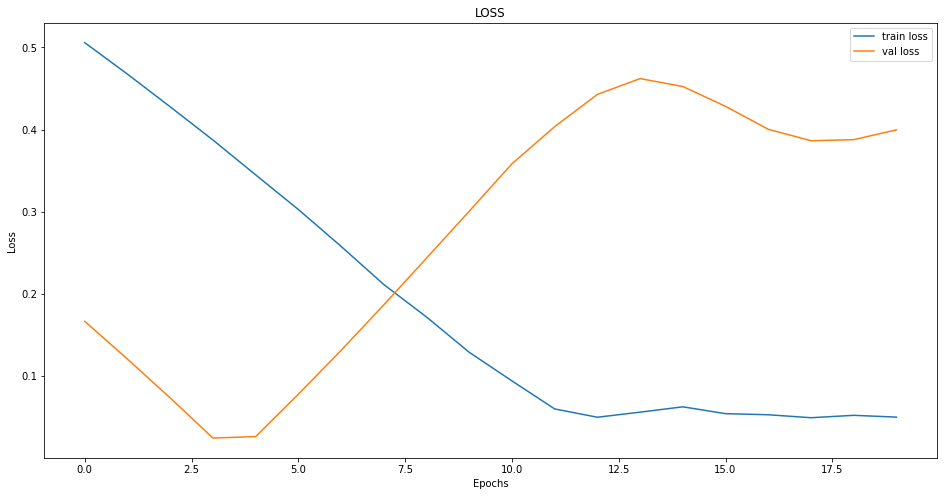

In [105]:
# 显示 train loss 和 val loss

plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("LOSS")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

In [106]:
# 模型验证

test_pred = model.predict(X_test, verbose=1)

1/1 [==============================] - 1s 522ms/step


In [107]:
test_pred.shape # 预测结果的shape

(2, 1)

In [108]:
y_test.shape # 真值标签的shape

(2,)

In [109]:
# 计算r2

score = r2_score(y_test, test_pred)

In [110]:
print("r^2 的值： ", score)

r^2 的值：  -115918.39019730667


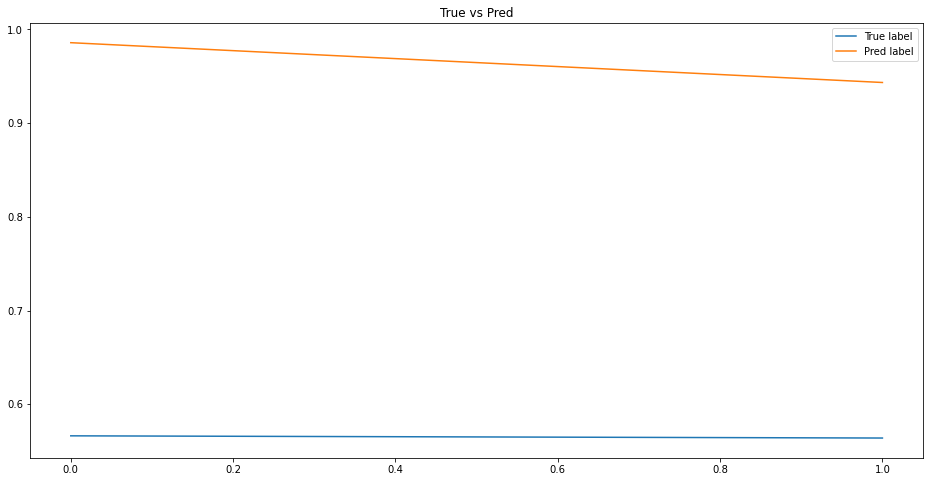

In [111]:
# 绘制模型验证结果

plt.figure(figsize=(16,8))
plt.plot(y_test, label="True label")
plt.plot(test_pred, label="Pred label")
plt.title("True vs Pred")
plt.legend(loc='best')
plt.show()

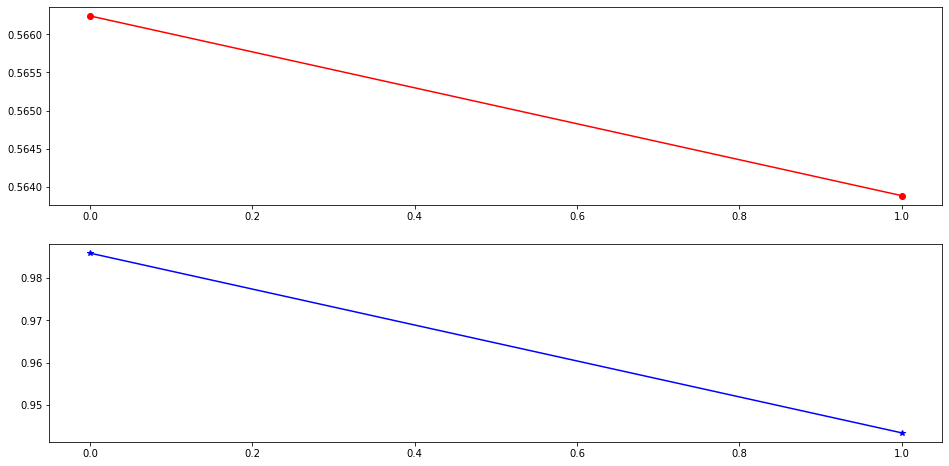

In [112]:
# 绘制test中前100个点的真值与预测值

y_true = y_test[:100]
y_pred = test_pred[:100]

fig, axes = plt.subplots(2, 1, figsize=(16,8))
axes[0].plot(y_true, marker='o', color='red')
axes[1].plot(y_pred, marker='*', color='blue')
plt.show()

### 第5步：模型测试

#### ① 预测1个样本

In [114]:
# 选择test中的最后一个样本
sample = X_test[-1]

sample.shape

(6,)

In [115]:
sample = sample.reshape(1, sample.shape[0], 1)

sample.shape

(1, 6, 1)

In [116]:
# 模型预测

sample_pred = model.predict(sample)

sample_pred

1/1 [==============================] - 1s 527ms/step


array([[0.94341415]], dtype=float32)

#### ② 预测后续20个点的值 

In [117]:
ture_data = X_test[-1] # 真实test的最后20个数据点

In [118]:
ture_data

array([0.99107452, 1.        , 0.97853008, 0.92583949, 0.75513612,
       0.56623954])

In [119]:
ture_data.shape

(6,)

In [123]:
def predict_next(model, sample, epoch=20):
    temp1 = list(sample)
    for i in range(epoch):
        sample = sample.reshape(1, SEQ_LEN, 1)
        pred = model.predict(sample)
        value = pred.tolist()[0][0]
        temp1.append(value)
        sample = np.array(temp1[i+1 : i+SEQ_LEN+1])
    return temp1

In [124]:
preds = predict_next(model, ture_data, 20)

1/1 [==============================] - 0s 26ms/step


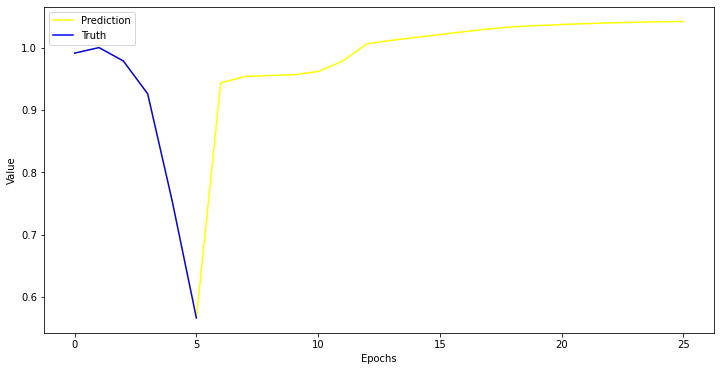

In [125]:
plt.figure(figsize=(12,6))
plt.plot(preds, color='yellow', label='Prediction')
plt.plot(ture_data, color='blue', label='Truth')
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend(loc='best')
plt.show()